In [6]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm

import xtrack as xt
import xobjects as xo
import xpart as xp


beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


current=2.4
length = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 100e-3 # <E> [eV] = kb*T
T_l =  1e-3 # <E> [eV]
B = 0.060 # T for AD
B_ratio=1e-10



c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



circumference = 182.43280000000 #m
T = circumference/(c*beta_rel)
s_per_turn = T


beta_x=10 
beta_y=4

disp_x=0

                                        


Parameters: $I=2.4 A, B=0.060 T, \beta_x=10 m,\beta_y=4,D_x=0.12 m T_\perp=100meV,T_\parallel=1meV,\epsilon_{x}=35*1e-6,\epsilon_{y}=35*1e-6,dp/p=1e-3$

In [7]:
cooling_time=[]
num_particles=1

beta_values=np.linspace(1, 500, num=20)

#beta_values=[1000]

for beta in tqdm(beta_values):
     
    beta_x=beta
    

    arc=xt.LinearTransferMatrix(Q_x=5.44, Q_y=5.42,
                                beta_x_0=beta_x, beta_x_1=beta_x,
                                beta_y_0=beta_y,  beta_y_1=beta_y,
                                alpha_x_0=0,   alpha_x_1=0,
                                alpha_y_0=0,   alpha_y_1=0,
                                disp_x_0=disp_x,disp_x_1=disp_x,
                                disp_y_0=0,    disp_y_1=0,
                                beta_s=1*1e40,
                                Q_s=0,
                                chroma_x=0.0, chroma_y=0)

    


    #num_particles=1000
    #old
    emittance=5*1e-6 #inital emittance
    
    sigma_x = np.sqrt(beta_x*emittance)
    sigma_px = np.sqrt(emittance*1/beta_x)
    sigma_y = np.sqrt(beta_y*emittance)
    sigma_py = np.sqrt(emittance*1/beta_y)
    sigma_p = 5e-4


    delta = np.random.normal(loc=0.0, scale=sigma_p,  size=num_particles)
    x =     np.random.normal(loc=0.0, scale=sigma_x,  size=num_particles)+disp_x*delta
    px =    np.random.normal(loc=0.0, scale=sigma_px, size=num_particles)
    y =     np.random.normal(loc=0.0, scale=sigma_y,  size=num_particles)
    py =    np.random.normal(loc=0.0, scale=sigma_py, size=num_particles)

    emittance_tail=35*1e-6
    x_tail = np.sqrt(beta_x*emittance_tail)

    particles = xp.Particles(
            
            mass0=mass0,
            p0c=p0c,
            x=x_tail,
            px=0,
            y=0,
            py=0,
            delta=0,
            zeta=0)


    cooler = xt.ElectronCooler(current=current,length=length,r_beam=r_beam,
                                            T_perp=T_perp,T_l=T_l,
                                            B=B,B_ratio=B_ratio,
                                            Neutralisation_space_charge=1)

        

    num_turns=int(1*1e7)
    step=int(num_turns/100)

    # initialize arrays
    x, px, delta, action_x = [], [], [], []
    
    # loop over turns
    for i in tqdm(range(num_turns), desc='Cooling Progress', leave=False):
        action_x_temp = (particles.x**2/beta_x + beta_x*particles.px**2)
        if action_x_temp < 0.1* emittance_tail:
                    cooling_time.append(i*s_per_turn)
                    break

        
        # track particle
        arc.track(particles)
        cooler.track(particles)
    
   
    if action_x_temp >= 0.1* emittance_tail:
        cooling_time.append(num_turns * s_per_turn)  # Append default value if cooling condition is not met
            

  0%|          | 0/20 [09:38<?, ?it/s]


KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


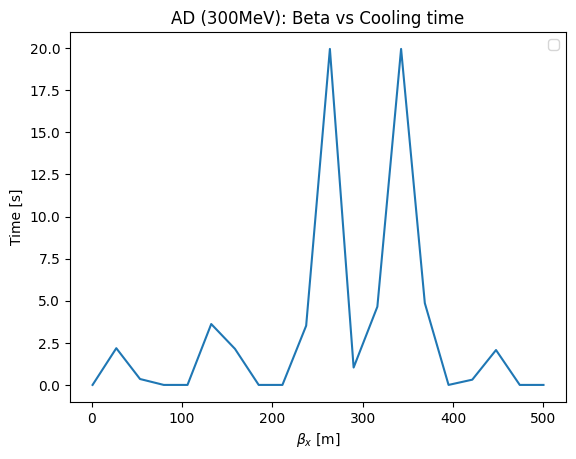

In [ ]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(beta_values,cooling_time)
plt.xlabel(r'$\beta_x$ [m]')
plt.ylabel('Time [s]')
plt.title('AD (300MeV): Beta vs Cooling time')
plt.legend()
plt.ticklabel_format(useOffset=False)